# Kmeans + Hierarchical Clustering

In [24]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

### Loading in data

In [4]:
# loading in data
file_path = os.path.join("data", "movement_libras.csv")
data_df = pd.read_csv(file_path)

data_df.head()

,1st_coordinate_abcissa,1st_coordinate_ordinate,2st_coordinate_abcissa,2st_coordinate_ordinate,3st_coordinate_abcissa,3st_coordinate_ordinate,4st_coordinate_abcissa,4st_coordinate_ordinate,5st_coordinate_abcissa,5st_coordinate_ordinate,...,41st_coordinate_ordinate,42st_coordinate_abcissa,42st_coordinate_ordinate,43st_coordinate_abcissa,43st_coordinate_ordinate,44st_coordinate_abcissa,44st_coordinate_ordinate,45st_coordinate_abcissa,45st_coordinate_ordinate,Class
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398,1
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213,1
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778,1
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306,1
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259,1


### Preprocessing

In [5]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# extract labels and predictors
labels = data_df['Class']
predictors = data_df.drop('Class', axis = 1)

# Fit the scaler to the data and transform the data
scaled_preds = scaler.fit_transform(predictors)

# turning scaled_data into dataframe
scaled_data = pd.DataFrame(scaled_preds, columns=predictors.columns)

# concat scaled data and labels
scaled_df = pd.concat([scaled_data, labels], axis = 1)


### Kmeans

In [35]:
ari = np.zeros(1000)
nmi = np.zeros(1000)

In [36]:
import warnings

# Filter FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# for loop from 1 to 1000
for i in range(0, 1000):

    # Initializing KMeans object
    kmeans = KMeans(n_clusters = 15)

    # Fit the KMeans model to the data
    kmeans.fit(scaled_df.drop('Class', axis=1))

    # Get the cluster labels for each data point
    pred_labels = kmeans.labels_

    # get the scores
    ari[i] = adjusted_rand_score(labels, pred_labels)
    nmi[i] = normalized_mutual_info_score(labels, pred_labels)

In [37]:
# getting summary statistics for ari
print(np.mean(ari))
print(np.std(ari))

# getting summary statistics for ari
print(np.mean(nmi))
print(np.std(nmi))

0.3110658343911655
0.0130320400883251
0.5937102018914463
0.011266739630071666


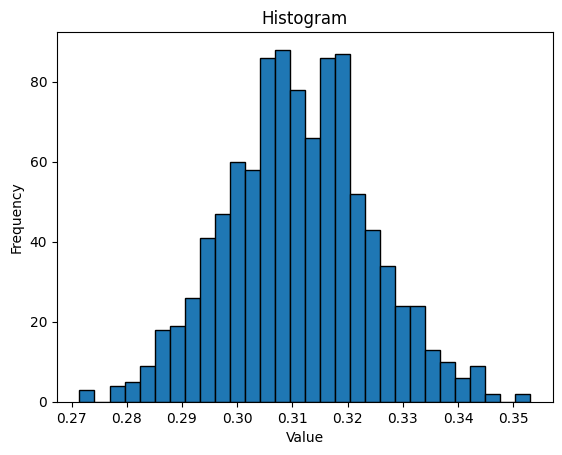

In [38]:
# ari histogram
plt.hist(ari, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()


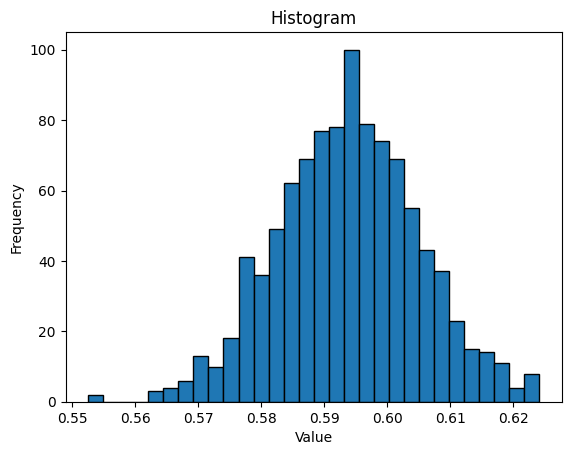

In [39]:
# nmi histogram
plt.hist(nmi, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()
